# Gradient Boosting Machines

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
y = df["Outcome"]
X = df.drop("Outcome", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [4]:
model = GradientBoostingClassifier().fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

In [5]:
params = {
    "learning_rate": [0.1,0.01,0.001,0.05],
    "n_estimators": [100,200,300,400,500,600,700,800,900,1000],
    "max_depth": [2,3,4,5,6,7,8,9,10,15,20],
}
model = GradientBoostingClassifier()
model_cv = GridSearchCV(model, params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 440 candidates, totalling 4400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 4400 out of 4400 | elapsed: 17.9min finished


In [6]:
model_cv.best_params_

{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 900}

In [20]:
model_cv.best_estimator_.n_estimators

0.01

In [21]:
model_tuned = GradientBoostingClassifier(learning_rate=model_cv.best_estimator_.learning_rate, 
                                         n_estimators=model_cv.best_estimator_.n_estimators, 
                                         max_depth=model_cv.best_estimator_.max_depth).fit(X_train, y_train)
y_pred = model_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7316017316017316

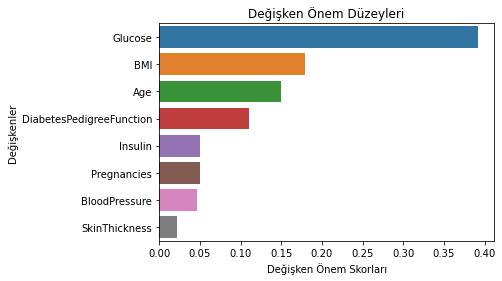

In [22]:
feature_imp = pd.Series(model_tuned.feature_importances_, index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Değişken Önem Düzeyleri")
plt.xlabel("Değişken Önem Skorları")
plt.ylabel("Değişkenler")
plt.show()